# CS 424 Project 1

## Team Name: Team COD
## Team Members: Indu Reddy Pati and Shiva Praveen Donga

### Import Required Libraries

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import datetime
import matplotlib.pyplot as plot
import matplotlib.pyplot as plot_adr
from matplotlib.pyplot import figure

### Read Speed Violations .CSV Data from  07/01/2014 to 08/31/2022.
### Explore dataset - size, attributes etc.

In [2]:
# Read CSV to DataFrame
df = pd.read_csv("data/Speed_Camera_Violations.csv")

# Shape of Dataset before cleaning
df.shape

(309320, 9)

In [3]:
# Head of Speed Camera Violations DataFrame
df.head()

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,1111 N HUMBOLDT,CHI010,04/10/2015,67,NaN,NaN,NaN,NaN,NaN
1,1111 N HUMBOLDT,CHI010,04/25/2015,71,NaN,NaN,NaN,NaN,NaN
2,1111 N HUMBOLDT,CHI010,04/14/2015,38,NaN,NaN,NaN,NaN,NaN
3,1111 N HUMBOLDT,CHI010,04/16/2015,55,NaN,NaN,NaN,NaN,NaN
4,1111 N HUMBOLDT,CHI010,04/24/2015,54,NaN,NaN,NaN,NaN,NaN


In [4]:
# Check column names
df.columns

Index(['ADDRESS', 'CAMERA ID', 'VIOLATION DATE', 'VIOLATIONS', 'X COORDINATE',
       'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [5]:
# Rename column names
df = df.rename({'CAMERA ID': 'CAMERA_ID', 'VIOLATION DATE': 'VIOLATION_DATE', 
                'X COORDINATE': 'X_COORDINATE', 'Y COORDINATE': 'Y_COORDINATE'}, axis=1)
df.columns

Index(['ADDRESS', 'CAMERA_ID', 'VIOLATION_DATE', 'VIOLATIONS', 'X_COORDINATE',
       'Y_COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

### Clean Dataset - Remove NaN or Null values

In [6]:
# Check how many entries for each column are null
df.isnull().sum()

ADDRESS               0
CAMERA_ID             0
VIOLATION_DATE        0
VIOLATIONS            0
X_COORDINATE      11782
Y_COORDINATE      11782
LATITUDE          11782
LONGITUDE         11782
LOCATION          11782
dtype: int64

In [7]:
# Drop all rows with at least one missing value
df = df.dropna()

In [8]:
# Check if any column has null values
df.isnull().sum()

ADDRESS           0
CAMERA_ID         0
VIOLATION_DATE    0
VIOLATIONS        0
X_COORDINATE      0
Y_COORDINATE      0
LATITUDE          0
LONGITUDE         0
LOCATION          0
dtype: int64

In [9]:
# DataFrame after cleaning
df.head()

,ADDRESS,CAMERA_ID,VIOLATION_DATE,VIOLATIONS,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE,LOCATION
366,3100 W AUGUSTA,CHI011,12/01/2020,23,1.155438e+06,1.906531e+06,41.899325,-87.704522,"(41.89932514072566, -87.70452234551168)"
368,3450 W 71ST,CHI015,12/01/2020,19,1.154378e+06,1.857352e+06,41.764391,-87.709728,"(41.76439095689881, -87.70972841983624)"
369,2917 W ROOSEVELT,CHI019,07/28/2020,36,1.156992e+06,1.894531e+06,41.866364,-87.699143,"(41.866364024167034, -87.69914296647906)"
370,3542 E 95TH ST,CHI141,07/28/2020,8,1.201629e+06,1.842674e+06,41.723045,-87.537041,"(41.72304461975978, -87.5370407583455)"
371,8345 S ASHLAND AVE,CHI168,07/27/2019,27,1.167170e+06,1.849194e+06,41.741742,-87.663073,"(41.741741651401504, -87.66307332925098)"


In [10]:
# Shape of Dataset after cleaning
df.shape

(297538, 9)

### Profile the data - mean, min, max, std etc

In [11]:
# Describe the dataset
df.describe()

,VIOLATIONS,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE
count,297538.000000,2.975380e+05,2.975380e+05,297538.000000,297538.000000
mean,37.054272,1.159572e+06,1.893263e+06,41.862815,-87.689751
std,52.055616,1.627429e+04,3.219925e+04,0.088554,0.059215
min,1.000000,1.121638e+06,1.820629e+06,41.663174,-87.828317
25%,7.000000,1.149548e+06,1.868078e+06,41.793493,-87.726205
50%,19.000000,1.159529e+06,1.898488e+06,41.877243,-87.688862
75%,46.000000,1.167695e+06,1.920991e+06,41.939040,-87.661138
max,827.000000,1.203645e+06,1.943342e+06,42.000260,-87.529848


### Extract or Transform and add required columns to Dataset - weekday, year, month, day from VIOLATION_DATE

In [12]:
violation_list = df['VIOLATION_DATE'].tolist()
weekday = []
month_list = []
year_list = []
day_list = []

# Extract weekday, year, month and day from VIOLATION_DATE
for i in violation_list:
    month, day, year = (int(x) for x in i.split('/'))
    month_list.append(month)
    year_list.append(year)
    day_list.append(day)
    weekday.append(datetime.date(year, month, day).weekday())

# Add extracted weekday, year, day and month columns to dataset
df['WEEKDAY'] = weekday
df['YEAR'] = year_list
df['DAY'] = day_list
df['MONTH'] = month_list

# Sort Dataset based on Weekday
df = df.sort_values(by=['WEEKDAY'])

# Display head
df.head()

,ADDRESS,CAMERA_ID,VIOLATION_DATE,VIOLATIONS,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE,LOCATION,WEEKDAY,YEAR,DAY,MONTH
170913,8020 W FOREST PRESERVE AV,CHI174,01/07/2019,100,1.121895e+06,1.922706e+06,41.944319,-87.827378,"(41.944318833069445, -87.8273782786742)",0,2019,7,1
157746,7122 S SOUTH CHICAGO AVE,CHI184,05/20/2019,65,1.182951e+06,1.857908e+06,41.765301,-87.604985,"(41.76530133793055, -87.60498537037378)",0,2019,20,5
274433,732 N PULASKI RD,CHI109,06/07/2021,40,1.149548e+06,1.904732e+06,41.894503,-87.726205,"(41.89450330881178, -87.72620452246953)",0,2021,7,6
54126,1901 E 75TH ST,CHI138,03/18/2019,14,1.190192e+06,1.855580e+06,41.758741,-87.578519,"(41.758740770124234, -87.57851859043261)",0,2019,18,3
157734,2917 W ROOSEVELT,CHI019,01/30/2017,52,1.156992e+06,1.894531e+06,41.866364,-87.699143,"(41.866364024167034, -87.69914296647906)",0,2017,30,1


In [13]:
# Replace numeric value of weekday to string such as 0 - Monday, 1 - Tuesday, ..... 6 - Sunday
df['WEEKDAY'].mask(df['WEEKDAY'] == 0, 'Monday', inplace=True)
df['WEEKDAY'].mask(df['WEEKDAY'] == 1, 'Tuesday', inplace=True)
df['WEEKDAY'].mask(df['WEEKDAY'] == 2, 'Wednesday', inplace=True)
df['WEEKDAY'].mask(df['WEEKDAY'] == 3, 'Thursday', inplace=True)
df['WEEKDAY'].mask(df['WEEKDAY'] == 4, 'Friday', inplace=True)
df['WEEKDAY'].mask(df['WEEKDAY'] == 5, 'Saturday', inplace=True)
df['WEEKDAY'].mask(df['WEEKDAY'] == 6, 'Sunday', inplace=True)

# Display head
df.head()

,ADDRESS,CAMERA_ID,VIOLATION_DATE,VIOLATIONS,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE,LOCATION,WEEKDAY,YEAR,DAY,MONTH
170913,8020 W FOREST PRESERVE AV,CHI174,01/07/2019,100,1.121895e+06,1.922706e+06,41.944319,-87.827378,"(41.944318833069445, -87.8273782786742)",Monday,2019,7,1
157746,7122 S SOUTH CHICAGO AVE,CHI184,05/20/2019,65,1.182951e+06,1.857908e+06,41.765301,-87.604985,"(41.76530133793055, -87.60498537037378)",Monday,2019,20,5
274433,732 N PULASKI RD,CHI109,06/07/2021,40,1.149548e+06,1.904732e+06,41.894503,-87.726205,"(41.89450330881178, -87.72620452246953)",Monday,2021,7,6
54126,1901 E 75TH ST,CHI138,03/18/2019,14,1.190192e+06,1.855580e+06,41.758741,-87.578519,"(41.758740770124234, -87.57851859043261)",Monday,2019,18,3
157734,2917 W ROOSEVELT,CHI019,01/30/2017,52,1.156992e+06,1.894531e+06,41.866364,-87.699143,"(41.866364024167034, -87.69914296647906)",Monday,2017,30,1


### Check Unique Addresses and count. Find Average Max and Min Violations at which Address

In [14]:
# Check Address coulmns unique values
df['ADDRESS'].unique()

array(['8020 W FOREST PRESERVE AV', '7122 S SOUTH CHICAGO AVE',
       '732 N PULASKI RD', '1901 E 75TH ST', '2917 W ROOSEVELT',
       '346 W 76th ST', '8345 S ASHLAND AVE', '450 N COLUMBUS DR',
       '4843 W FULLERTON', '3111 N ASHLAND AVE', '3200 S ARCHER AVE',
       '341 W 76th ST', '9618 S EWING AVE', '5454 W IRVING PARK',
       '1142 W IRVING PARK', '6247 W FULLERTON', '4831 W LAWRENCE AVE',
       '2329 W DIVISION ST', '3851 W 79th', '1315 W GARFIELD BLVD',
       '4432 N LINCOLN', '4929 S PULASKI', '6909 S KEDZIE',
       '4965 S ARCHER', '1754 N PULASKI RD', '10318 S INDIANAPOLIS',
       '2912 W ROOSEVELT', '5471 W HIGGINS', '4620 W BELMONT AVE',
       '2109 E 87TH ST', '7833 S PULASKI', '3521 N WESTERN',
       '3116 N NARRAGANSETT AVE', '2416 W 103RD ST', '4319 W 47TH ST',
       '2448 N CLYBOURN AVE', '1638 N ASHLAND AVE', '3450 W 71ST',
       '4446 N BROADWAY', '4124 W FOSTER AVE', '11144 S VINCENNES',
       '5509 W FULLERTON', '5885 N RIDGE AVE', '515 S CENTRAL AVE

In [15]:
# Count Address columns number of unique values
len(df['ADDRESS'].value_counts())

160

In [16]:
# Average number of violations issued per address

avg_violatn_address = df['VIOLATIONS'].groupby(df['ADDRESS'])
df_avg_violatn_address = avg_violatn_address.mean().to_frame(name='AVG_VIOLATIONS_PER_ADDR').reset_index() 
df_avg_violatn_address.head()

,ADDRESS,AVG_VIOLATIONS_PER_ADDR
0,10318 S INDIANAPOLIS,125.495372
1,11 E CHICAGO AVE,8.373684
2,1110 S PULASKI RD,23.311755
3,11144 S VINCENNES,25.527778
4,11153 S VINCENNES,12.830218


In [17]:
# Address with max avg voilations
df_avg_violatn_address.loc[df_avg_violatn_address['AVG_VIOLATIONS_PER_ADDR'].idxmax()]

ADDRESS                    4909 N CICERO AVE
AVG_VIOLATIONS_PER_ADDR           202.716567
Name: 107, dtype: object

In [18]:
# Address with max avg voilations
df_avg_violatn_address.loc[df_avg_violatn_address['AVG_VIOLATIONS_PER_ADDR'].idxmin()]

ADDRESS                    18 W SUPERIOR ST
AVG_VIOLATIONS_PER_ADDR            1.320225
Name: 23, dtype: object

### Bar Plot for Average Speed Violations per Address

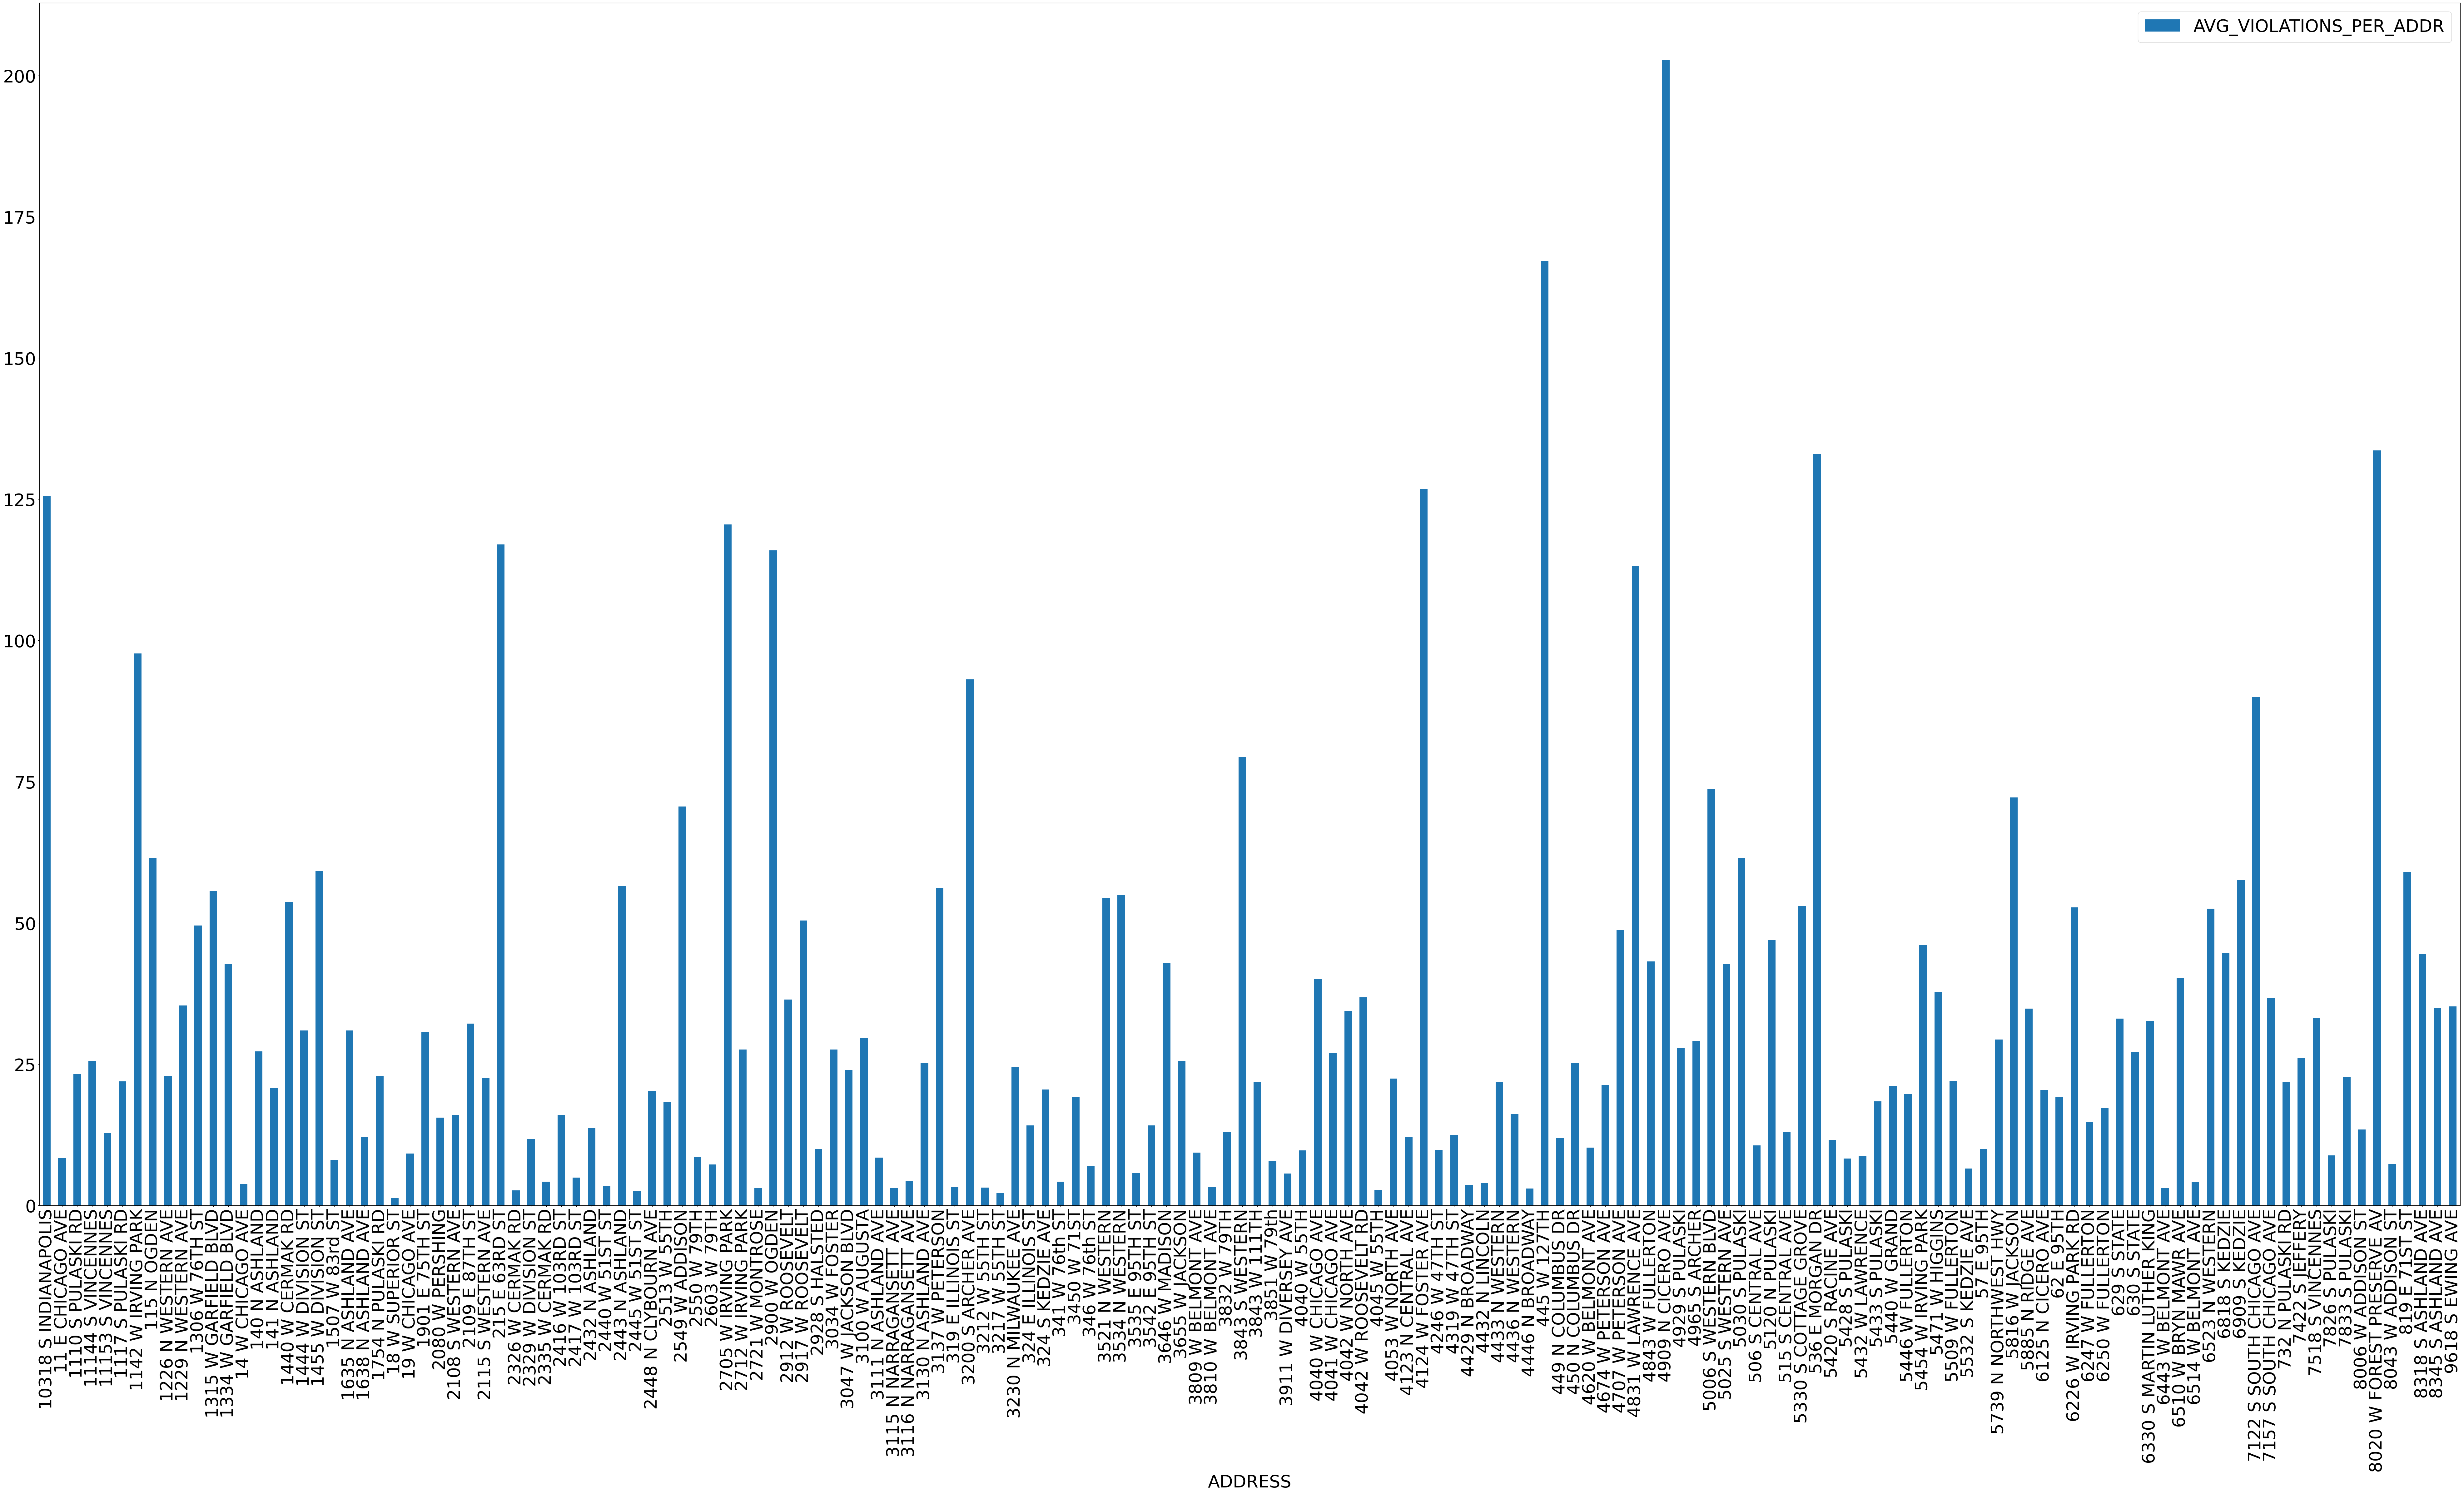

In [19]:
# Find Average Speed Violations per Address
df_avg_violatn_per_addr = avg_violatn_address.mean().to_frame(name='AVG_VIOLATIONS_PER_ADDR')

plot.rcParams['figure.figsize'] = [100, 50]
plot.rcParams.update({'font.size': 40})

# Plot bar
df_avg_violatn_per_addr.plot.bar();

plot.show(block = True);

### Check Unique Camera Ids and count. Find Max and Min Violations are for which Camera Id

In [20]:
# Check CAMERA_ID coulmns unique values
df['CAMERA_ID'].unique()

array(['CHI174', 'CHI184', 'CHI109', 'CHI138', 'CHI019', 'CHI136',
       'CHI168', 'CHI125', 'CHI044', 'CHI171', 'CHI144', 'CHI137',
       'CHI142', 'CHI050', 'CHI095', 'CHI039', 'CHI147', 'CHI129',
       'CHI073', 'CHI121', 'CHI056', 'CHI030', 'CHI014', 'CHI032',
       'CHI157', 'CHI120', 'CHI020', 'CHI102', 'CHI086', 'CHI145',
       'CHI071', 'CHI026', 'CHI132', 'CHI154', 'CHI178', 'CHI090',
       'CHI113', 'CHI015', 'CHI097', 'CHI003', 'CHI023', 'CHI041',
       'CHI093', 'CHI057', 'CHI130', 'CHI141', 'CHI007', 'CHI080',
       'CHI101', 'CHI049', 'CHI027', 'CHI172', 'CHI040', 'CHI005',
       'CHI175', 'CHI009', 'CHI167', 'CHI124', 'CHI013', 'CHI114',
       'CHI036', 'CHI128', 'CHI028', 'CHI029', 'CHI126', 'CHI094',
       'CHI058', 'CHI045', 'CHI181', 'CHI133', 'CHI127', 'CHI108',
       'CHI123', 'CHI021', 'CHI055', 'CHI103', 'CHI076', 'CHI051',
       'CHI024', 'CHI042', 'CHI096', 'CHI088', 'CHI077', 'CHI149',
       'CHI087', 'CHI031', 'CHI163', 'CHI116', 'CHI143', 'CHI1

In [21]:
# Count CAMERA_ID columns number of unique values
len(df['CAMERA_ID'].unique())

158

In [22]:
# number of violations issued per camera
violatn_cam = df['VIOLATIONS'].groupby(df['CAMERA_ID'])
df_violatn_cam = violatn_cam.size().to_frame(name='TOTAL_VIOLATIONS_PER_CAM').reset_index()
df_violatn_cam

,CAMERA_ID,TOTAL_VIOLATIONS_PER_CAM
0,CHI003,2911
1,CHI004,2966
2,CHI005,2958
3,CHI007,2905
4,CHI008,2885
...,...,...
153,CHI181,556
154,CHI182,553
155,CHI183,559
156,CHI184,553


In [23]:
# Cam with max number of voilations
df_violatn_cam.loc[df_violatn_cam['TOTAL_VIOLATIONS_PER_CAM'].idxmax()]

CAMERA_ID                   CHI083
TOTAL_VIOLATIONS_PER_CAM      2976
Name: 62, dtype: object

In [24]:
# Cam with max number of voilations
df_violatn_cam.loc[df_violatn_cam['TOTAL_VIOLATIONS_PER_CAM'].idxmin()]

CAMERA_ID                   CHI131
TOTAL_VIOLATIONS_PER_CAM       178
Name: 108, dtype: object

In [25]:
df_violatn_cam

,CAMERA_ID,TOTAL_VIOLATIONS_PER_CAM
0,CHI003,2911
1,CHI004,2966
2,CHI005,2958
3,CHI007,2905
4,CHI008,2885
...,...,...
153,CHI181,556
154,CHI182,553
155,CHI183,559
156,CHI184,553


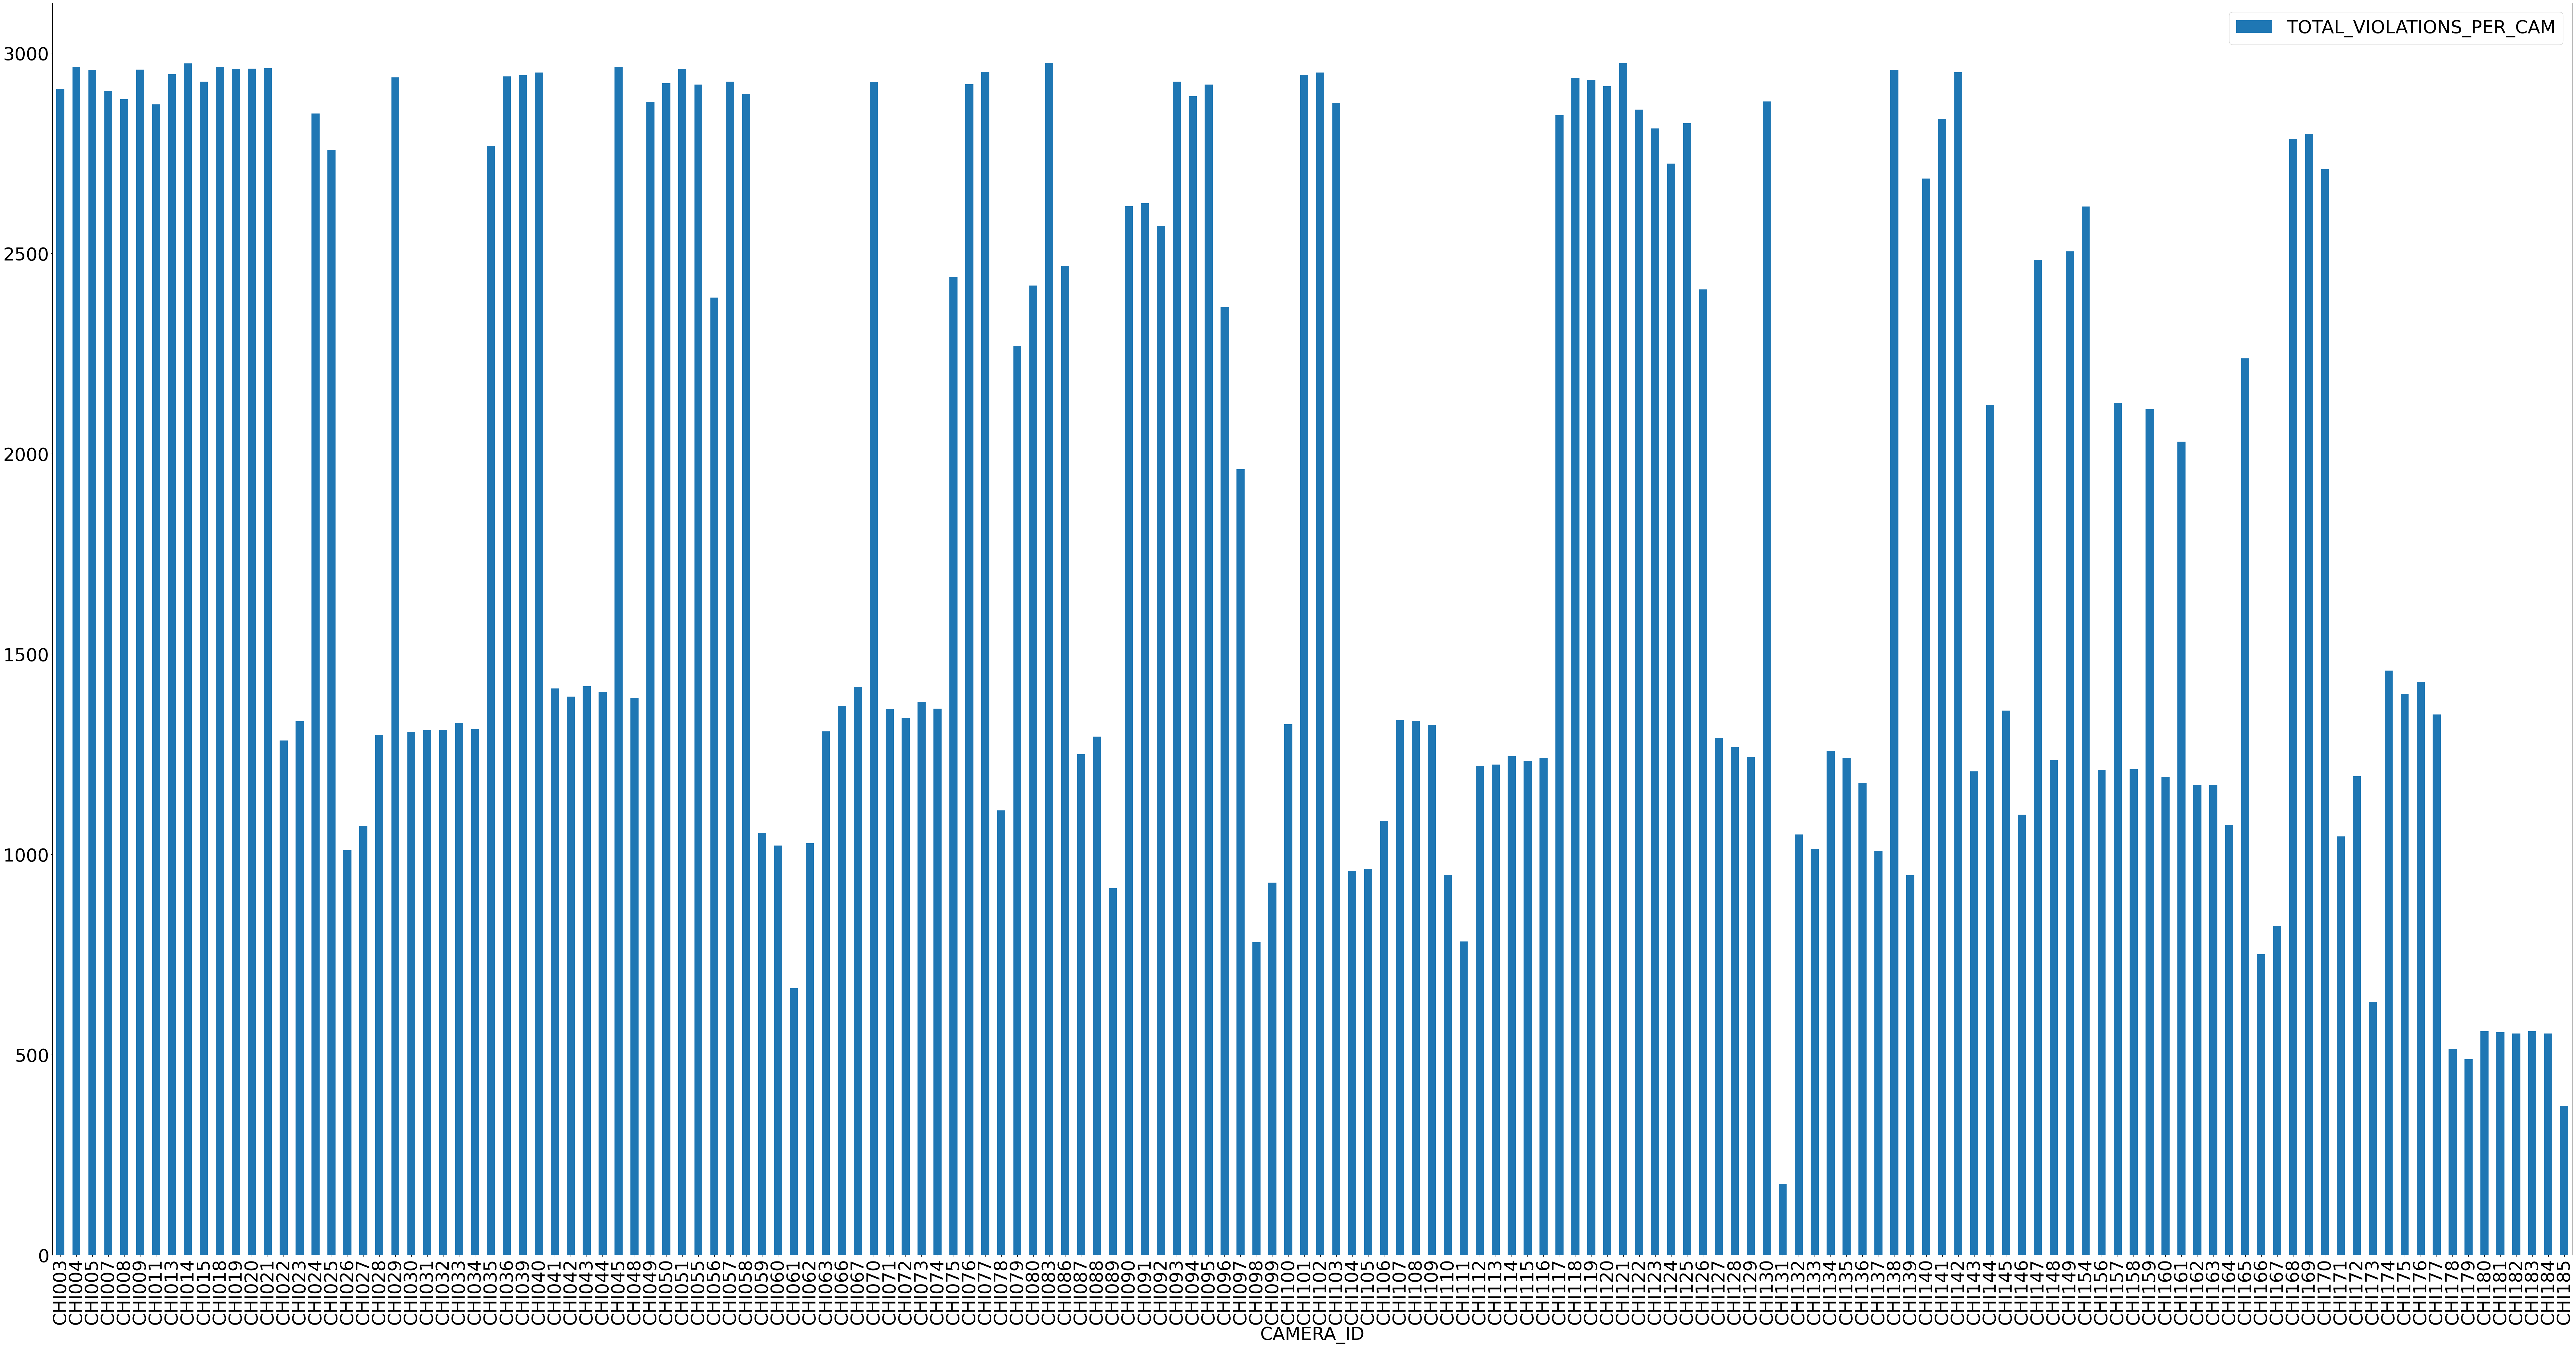

In [26]:
# Find Speed Violations per Camera Id
df_violatn_cam_id = violatn_cam.size().to_frame(name='TOTAL_VIOLATIONS_PER_CAM')

# Plot Bar
df_violatn_cam_id.plot.bar();

plot.show(block = True);

# Hypothesis-1: Speed Violations must have decreased over years due to Awareness and Strict Reinforcement of Speed Rules

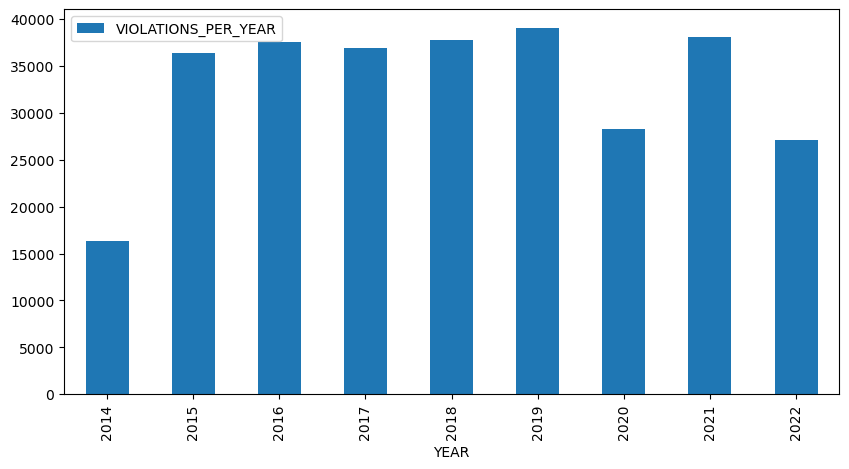

In [27]:
df_year = df['VIOLATIONS'].groupby(df['YEAR'])
df_year_violation = df_year.size().to_frame(name='VIOLATIONS_PER_YEAR')

plot.rcParams['figure.figsize'] = [10, 5]
plot.rcParams.update({'font.size': 10})

# Plot Bar
df_year_violation.plot.bar();
plot.show(block = True);

## Hypothesis-1 Conclusion: False. 
### 1. As speed violations across years looks similar for 2015-2019 and 2021. 
### 2. 2020 decresed speed violations might be due to CoVid Lockdown.
### 3. 2014 (from July-Dec) and 2022 (from Jan-Aug) are exceptions as data not available for entire year.

# Hypothesis-2: Speed Violation must be less during the winter/summer breaks. As most people will be on vacations and no worries to be not late to work.

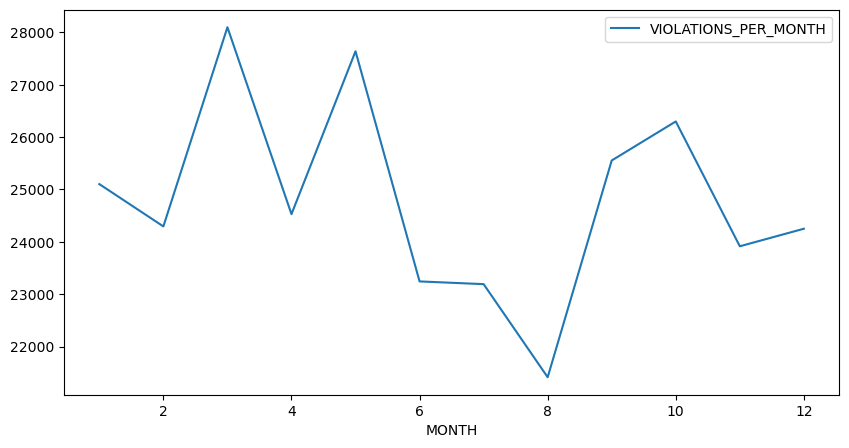

In [28]:
df_month = df['VIOLATIONS'].groupby(df['MONTH'])
df_month_violation = df_month.size().to_frame(name='VIOLATIONS_PER_MONTH')

# Plot line
df_month_violation.plot.line();
plot.show(block = True);

## Hypothesis-2 Conclusion: True. 
### 1. Speed violations during breaks are less. Summer breaks have much less violations than Winter. 
### 2. One more factor for high violations during Feb - May could be cold weather contributing to brake lock up.

# Hypothesis-3: Speed Violation must be similar across days in months.

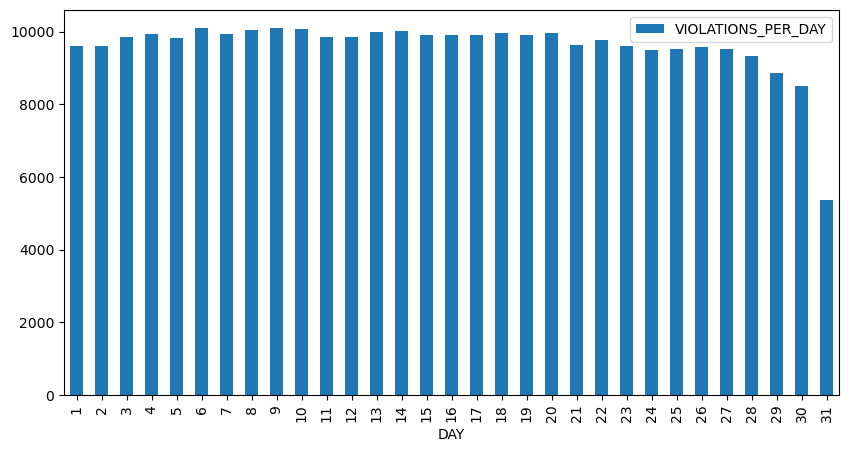

In [29]:
df_day = df['VIOLATIONS'].groupby(df['DAY'])
df_day_violation = df_day.size().to_frame(name='VIOLATIONS_PER_DAY')

# Plot bar
df_day_violation.plot.bar();
plot.show(block = True);

## Hypothesis-3 Conclusion: True. 
### 1. Speed violations are same across days in months. 
### 2. As, no reason for speed violations being less for any days during month.
### 3. 31st is exception as only 7 months have 31st in a year.

### Create GeoPandas Dataframe

In [30]:
# GeoPandas(gp)
geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs=4326) 

In [31]:
# Columns in dataframe
gdf.columns

Index(['ADDRESS', 'CAMERA_ID', 'VIOLATION_DATE', 'VIOLATIONS', 'X_COORDINATE',
       'Y_COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'WEEKDAY', 'YEAR',
       'DAY', 'MONTH', 'geometry'],
      dtype='object')

<AxesSubplot:>

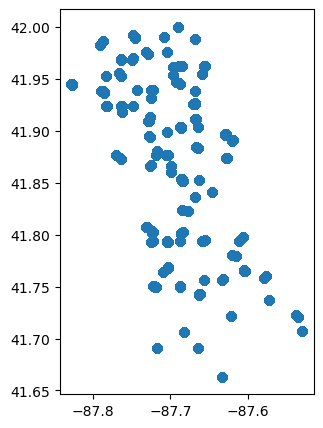

In [32]:
# Plot gp dataframe
gdf.plot()

In [33]:
# Read Chicago Zip geojson
chicago = gpd.read_file('data/chicago_zipcodes.geojson')
chicago.dtypes
chicago['zip'] = chicago['zip'].astype(float)

<AxesSubplot:>

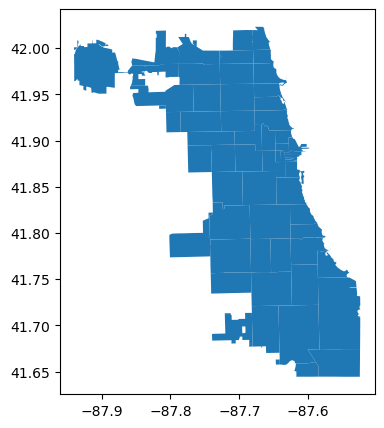

In [34]:
# Plot Chicago Map
chicago.plot()

# Hypothesis 4: Weekdays have more Speed Violations than Weekends

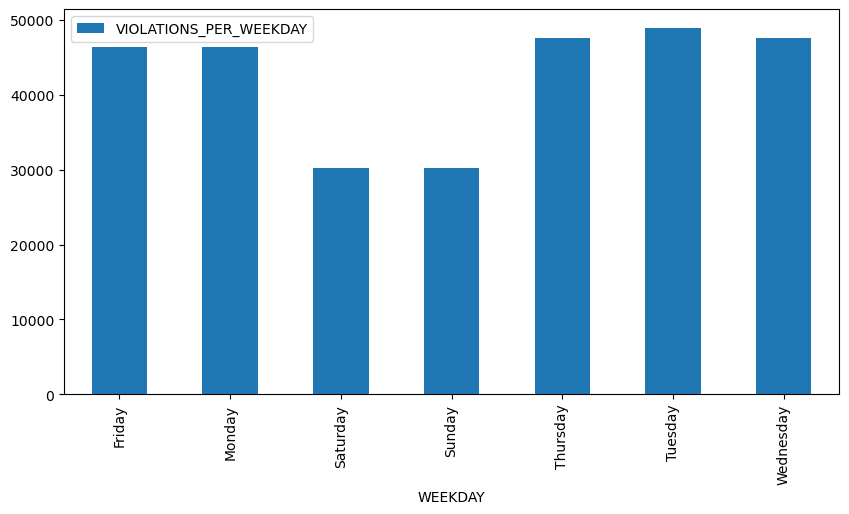

In [35]:
df_weekday = df['VIOLATIONS'].groupby(df['WEEKDAY'])
df_weekday_violation = df_weekday.size().to_frame(name='VIOLATIONS_PER_WEEKDAY')

# Plot bar
df_weekday_violation.plot.bar();

plot.show(block = True);

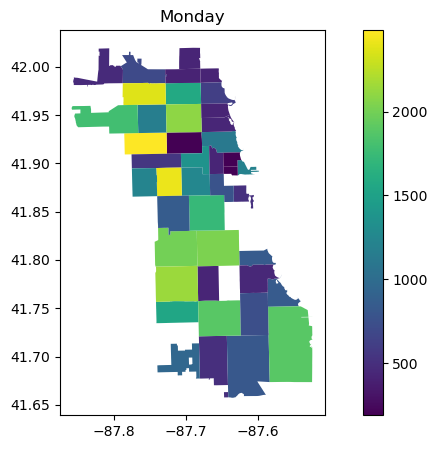

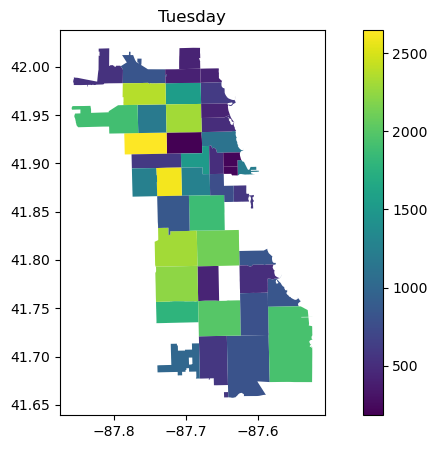

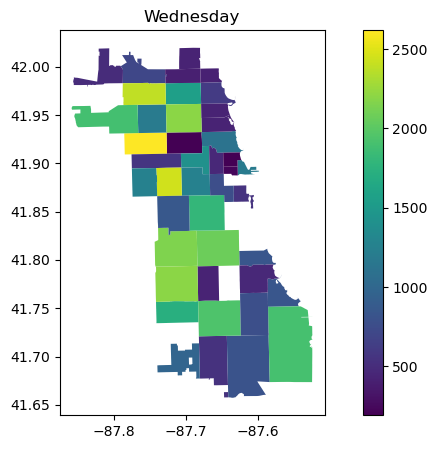

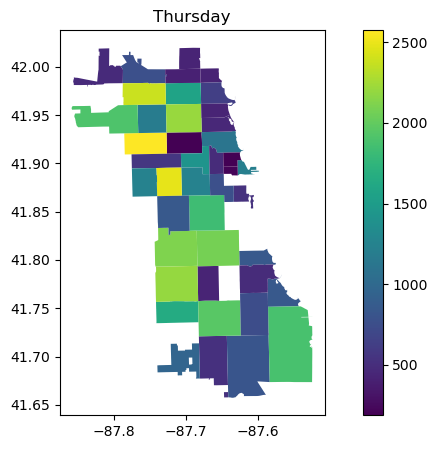

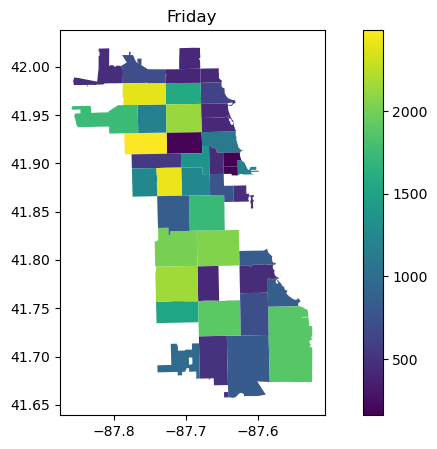

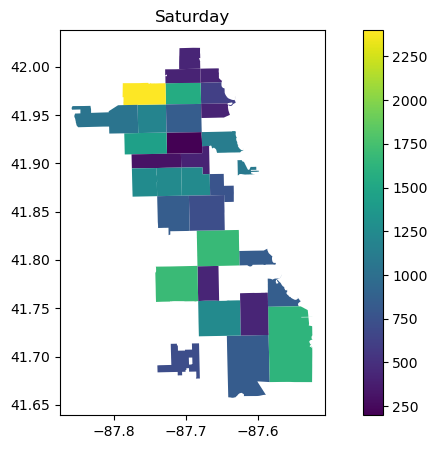

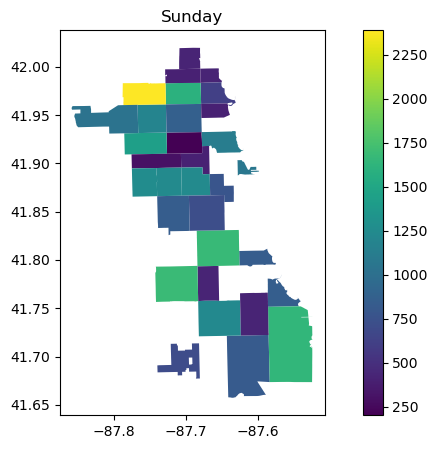

In [36]:
# Plot Heat Map
weeks = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for week in weeks:
    week_gdf = gdf.loc[df['WEEKDAY'] == week]
    # join Chicago Zip and Geopandas Dataframe winthin
    joined = gpd.sjoin(week_gdf, chicago, predicate='within')
    joined = joined.groupby('zip').count()
    joined = joined.filter(['geometry'])
    joined = joined.rename(columns={'geometry': 'count'})
    # Merge Joined and Chicago Dataframe on Zip column
    merged = chicago.merge(joined, left_on='zip', right_on='zip')
    # Plot Merged Dataframe
    ax = merged.plot('count', legend=True)
    ax.set_title(week)

## Hypothesis-4 Conclusion: True. 
### 1. Speed violations are less on weekends - Saturday and Sunday compared to weekdays Monday-Friday. 
### 2. Reason - No rush to workplace and People on trips to Chicago Suburbs for Visiting, Hiking etc.
### 3. No violations (Blank White Space in Heat Map) in certain Zip codes - Ashburn, Beverly etc.

# Heat Map for Whole Speed Violations Data

In [37]:
# join Chicago Zip and Geopandas Dataframe winthin
joined = gpd.sjoin(gdf, chicago, predicate='within')
joined = joined.groupby('zip').count()
joined = joined.filter(['geometry'])
joined = joined.rename(columns={'geometry': 'count'})

In [38]:
# Merge Joined and Chicago Dataframe on Zip column
merged = chicago.merge(joined, left_on='zip', right_on='zip')

<AxesSubplot:>

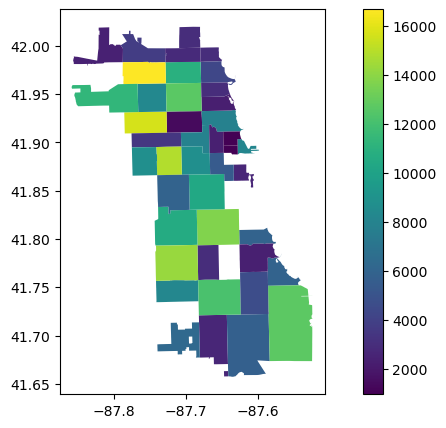

In [39]:
# Plot Merged Dataframe
merged.plot('count', legend=True)

## Conclusions from above Heat Map
### 1. No speed violations for certain zip codes - Downtown and Loop, Douglas, Oakland, Englewood etc.
### 2. Most Violations:
    a. North-West Neighbourhoods to Downtown Chicago - Jefferson Park, Belmont, Garfield Park etc.
    b. South-West Neighbourhoods to Downtown Chicago - Ashburn, Bridgeport etc.

<!-- Weekday - bar
Month - line
year - line/bar -->